#1. Introduction

**We will work on analysing 'Match.csv' file.**

##1.1. Importing Libraries, Uploading the dataset, and Creating functions.

Now, we are importing libraries with aliases to ease their usage more often to help in data analyzing.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we are uploading the dataset which we will analysis.

In [2]:
mtc = pd.read_csv("Match.csv") #using attribute (read_csv) to upload our file

We are creating functions which will be used later in EDA.

In [3]:
'''
Plot a histogram from a DataFrame column, with a title and axis labels.
Parameters:
df (pd.DataFrame): The pandas DataFrame containing the data.
column (str): The column to create the histogram.
title (str): The title of the histogram.
xlabel (str): The label for the x-axis.
ylabel (str): The label for the y-axis.
bins (int): The number of bins to use in the histogram.
Returns: None
'''
def plot_histogram(df, column, title, xlabel, ylabel, bins=10):
   plt.hist(df[column], bins=bins)
   plt.title(title)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   plt.show()

##1.2. Questions for Analysis.

***Is it harder to score goals as the stages progress?***

#2. Data-Wrangling

In [4]:
mtc.head() # To show the main heads.

id country_id               league_id     season  stage             date  \
0   1    Belgium  Belgium Jupiler League  2008/2009      1  17/08/2008 0:00   
1   2    Belgium  Belgium Jupiler League  2008/2009      1  16/08/2008 0:00   
2   3    Belgium  Belgium Jupiler League  2008/2009      1  16/08/2008 0:00   
3   4    Belgium  Belgium Jupiler League  2008/2009      1  17/08/2008 0:00   
4   5    Belgium  Belgium Jupiler League  2008/2009      1  16/08/2008 0:00   

   match_api_id   home_team_api_id   away_team_api_id  home_team_goal  ...  \
0        492473           KRC Genk       Beerschot AC               1  ...   
1        492474   SV Zulte-Waregem   Sporting Lokeren               0  ...   
2        492475  KSV Cercle Brugge     RSC Anderlecht               0  ...   
3        492476           KAA Gent          RAEC Mons               5  ...   
4        492477      FCV Dender EH  Standard de Liège               1  ...   

   away_player_10  away_player_11  goal  shoton  shotoff  foulcommit  card  \
0             NaN             NaN   NaN     NaN      NaN         NaN   NaN   
1             NaN             NaN   NaN     NaN      NaN         NaN   NaN   
2             NaN             NaN   NaN     NaN      NaN         NaN   NaN   
3             NaN             NaN   NaN     NaN      NaN         NaN   NaN   
4             NaN             NaN   NaN     NaN      NaN         NaN   NaN   

   cross  corner  possession  
0    NaN     NaN         NaN  
1    NaN     NaN         NaN  
2    NaN     NaN         NaN  
3    NaN     NaN         NaN  
4    NaN     NaN         NaN  

[5 rows x 85 columns]

We found that there are 85 different columns and some are including NaNs.

In [5]:
mtc.describe() # To show count, mean, std, min, max and other statistics for columns have numerical values.

id        stage  match_api_id  home_team_goal  away_team_goal  \
count  1821.000000  1821.000000  1.821000e+03     1821.000000     1821.000000   
mean    911.000000    15.593630  1.090944e+06        1.598023        1.189456   
std     525.821738     8.799266  5.186935e+05        1.292360        1.122115   
min       1.000000     1.000000  4.890420e+05        0.000000        0.000000   
25%     456.000000     8.000000  6.653960e+05        1.000000        0.000000   
50%     911.000000    15.000000  1.032753e+06        1.000000        1.000000   
75%    1366.000000    23.000000  1.717841e+06        2.000000        2.000000   
max    1821.000000    34.000000  1.980072e+06        7.000000        7.000000   

       home_player_X1  home_player_X2  home_player_X3  home_player_X4  \
count          1613.0     1613.000000     1613.000000     1613.000000   
mean              1.0        2.072536        4.016739        6.057037   
std               0.0        0.505867        0.458277        0.516930   
min               1.0        1.000000        2.000000        2.000000   
25%               1.0        2.000000        4.000000        6.000000   
50%               1.0        2.000000        4.000000        6.000000   
75%               1.0        2.000000        4.000000        6.000000   
max               1.0        8.000000        8.000000        8.000000   

       home_player_X5  ...  away_player_2  away_player_3  away_player_4  \
count     1613.000000  ...    1583.000000    1594.000000    1579.000000   
mean         7.168010  ...  108639.238155  101685.345044  110487.166561   
std          2.077809  ...  120845.535019  111257.846294  105217.834778   
min          1.000000  ...    3329.000000    3329.000000    3329.000000   
25%          8.000000  ...   37876.000000   37048.000000   37953.000000   
50%          8.000000  ...   39575.000000   39389.000000   67939.000000   
75%          8.000000  ...  150396.000000  149334.000000  166577.000000   
max          9.000000  ...  641042.000000  563215.000000  630950.000000   

       away_player_5  away_player_6  away_player_7  away_player_8  \
count    1592.000000    1593.000000    1598.000000    1590.000000   
mean   125438.379397  101948.699937  100801.453066  124197.310063   
std    104543.703153  122820.578525  109442.063439  126291.769497   
min      4863.000000    5272.000000    2770.000000    2770.000000   
25%     38393.000000   34437.000000   37112.000000   38253.000000   
50%    104386.000000   38788.000000   39304.500000   67925.000000   
75%    174078.000000  131530.000000  149258.000000  178291.000000   
max    641042.000000  688876.000000  658786.000000  659493.000000   

       away_player_9  away_player_10  away_player_11  
count    1579.000000     1592.000000     1587.000000  
mean   131565.808740   117178.437186   135512.630750  
std    121219.737378   117613.345916   122959.782209  
min      2770.000000     5016.000000     5016.000000  
25%     38383.000000    37101.250000    38369.000000  
50%    104382.000000    46552.000000    98407.000000  
75%    181073.000000   178291.000000   193064.500000  
max    676625.000000   671331.000000   671331.000000  

[8 rows x 71 columns]

This gives us a hint about teams' performance in various stages all over the seasons.

In [6]:
mtc.info()
# TO find datatypes, and to get first impression about the presence of NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 85 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1821 non-null   int64  
 1   country_id        1821 non-null   object 
 2   league_id         1821 non-null   object 
 3   season            1821 non-null   object 
 4   stage             1821 non-null   int64  
 5   date              1821 non-null   object 
 6   match_api_id      1821 non-null   int64  
 7   home_team_api_id  1821 non-null   object 
 8   away_team_api_id  1821 non-null   object 
 9   home_team_goal    1821 non-null   int64  
 10  away_team_goal    1821 non-null   int64  
 11  home_player_X1    1613 non-null   float64
 12  home_player_X2    1613 non-null   float64
 13  home_player_X3    1613 non-null   float64
 14  home_player_X4    1613 non-null   float64
 15  home_player_X5    1613 non-null   float64
 16  home_player_X6    1613 non-null   float64


There are some datatypes should be changed, some NaNs in most columns
and the last 8 columns have lots of NaNs.

In [7]:
mtc.isnull().sum().sum() # we are calculating the number of nulls

28071

There is 203935 null value.

In [8]:
# Displaying the columns values to see if it will effect us
mtc.iloc[:,77:]

goal  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1816  <goal><value><comment>n</comment><stats><goals...   
1817  <goal><value><comment>n</comment><stats><goals...   
1818  <goal><value><comment>n</comment><stats><goals...   
1819  <goal><value><comment>n</comment><stats><goals...   
1820                                                NaN   

                                                 shoton  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1816  <shoton><value><stats><shoton>1</shoton></stat...   
1817  <shoton><value><stats><blocked>1</blocked></st...   
1818  <shoton><value><stats><shoton>1</shoton></stat...   
1819  <shoton><value><stats><shoton>1</shoton></stat...   
1820                                                NaN   

                                                shotoff  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1816  <shotoff><value><stats><shotoff>1</shotoff></s...   
1817  <shotoff><value><stats><shotoff>1</shotoff></s...   
1818  <shotoff><value><stats><shotoff>1</shotoff></s...   
1819  <shotoff><value><stats><shotoff>1</shotoff></s...   
1820                                                NaN   

                                             foulcommit  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1816  <foulcommit><value><stats><foulscommitted>1</f...   
1817  <foulcommit><value><stats><foulscommitted>1</f...   
1818  <foulcommit><value><stats><foulscommitted>1</f...   
1819  <foulcommit><value><stats><foulscommitted>1</f...   
1820                                                NaN   

                                                   card  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1816  <card><value><comment>y</comment><stats><ycard...   
1817  <card><value><comment>y</comment><stats><ycard...   
1818  <card><value><comment>y</comment><stats><ycard...   
1819  <card><value><comment>y</comment><stats><ycard...   
1820                                                NaN   

                                                  cross  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1816  <cross><value><stats><crosses>1</crosses></sta...   
1817  <cross><value><stats><corner

These columns have unreadable, unhelpful and messy values, and should be removed to make a clear simple dataset.

In [9]:
mtc.duplicated().sum() # to figure out if there are duplicates or not

0

There are no duplicates.

#3. Data-Cleaning

In [10]:
mtc.drop(mtc.columns[11:], axis=1, inplace=True)
# Selecting the last columns will be dropped

Now, we are dropping the unuseful columns.


In [11]:
# adding a column for total of goals
total_goals= mtc['away_team_goal']+mtc['home_team_goal']
mtc.insert(11, 'total_goals', total_goals)
mtc

id country_id               league_id     season  stage  \
0        1    Belgium  Belgium Jupiler League  2008/2009      1   
1        2    Belgium  Belgium Jupiler League  2008/2009      1   
2        3    Belgium  Belgium Jupiler League  2008/2009      1   
3        4    Belgium  Belgium Jupiler League  2008/2009      1   
4        5    Belgium  Belgium Jupiler League  2008/2009      1   
...    ...        ...                     ...        ...    ...   
1816  1817    England  England Premier League  2008/2009     17   
1817  1818    England  England Premier League  2008/2009     17   
1818  1819    England  England Premier League  2008/2009     18   
1819  1820    England  England Premier League  2008/2009     18   
1820  1821    England  England Premier League  2008/2009     18   

                 date  match_api_id   home_team_api_id   away_team_api_id  \
0     17/08/2008 0:00        492473           KRC Genk       Beerschot AC   
1     16/08/2008 0:00        492474   SV Zulte-Waregem   Sporting Lokeren   
2     16/08/2008 0:00        492475  KSV Cercle Brugge     RSC Anderlecht   
3     17/08/2008 0:00        492476           KAA Gent          RAEC Mons   
4     16/08/2008 0:00        492477      FCV Dender EH  Standard de Liège   
...               ...           ...                ...                ...   
1816  13/12/2008 0:00        489210     Wigan Athletic   Blackburn Rovers   
1817  14/12/2008 0:00        489211            Chelsea    West Ham United   
1818  14/01/2009 0:00        489212  Manchester United     Wigan Athletic   
1819  21/12/2008 0:00        489213            Arsenal          Liverpool   
1820  20/12/2008 0:00        489214    West Ham United        Aston Villa   

      home_team_goal  away_team_goal  total_goals  
0                  1               1            2  
1                  0               0            0  
2                  0               3            3  
3                  5               0            5  
4                  1               3            4  
...              ...             ...          ...  
1816               3               0            3  
1817               1               1            2  
1818               1               0            1  
1819               1               1            2  
1820               0               1            1  

[1821 rows x 12 columns]

In [12]:
mtc.info() # to check for removing the dropped columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1821 non-null   int64 
 1   country_id        1821 non-null   object
 2   league_id         1821 non-null   object
 3   season            1821 non-null   object
 4   stage             1821 non-null   int64 
 5   date              1821 non-null   object
 6   match_api_id      1821 non-null   int64 
 7   home_team_api_id  1821 non-null   object
 8   away_team_api_id  1821 non-null   object
 9   home_team_goal    1821 non-null   int64 
 10  away_team_goal    1821 non-null   int64 
 11  total_goals       1821 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 170.8+ KB


Unuseful columns have been dropped.

In [13]:
# converting datatype to a valid one with date
mtc['date'] = pd.to_datetime(mtc['date'], dayfirst=True)

The date column type is converted to the valid datatype which is the date.

In [14]:
mtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1821 non-null   int64         
 1   country_id        1821 non-null   object        
 2   league_id         1821 non-null   object        
 3   season            1821 non-null   object        
 4   stage             1821 non-null   int64         
 5   date              1821 non-null   datetime64[ns]
 6   match_api_id      1821 non-null   int64         
 7   home_team_api_id  1821 non-null   object        
 8   away_team_api_id  1821 non-null   object        
 9   home_team_goal    1821 non-null   int64         
 10  away_team_goal    1821 non-null   int64         
 11  total_goals       1821 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 170.8+ KB


Datatype of date is converted.

#4. Data-Visualisation"EDA"

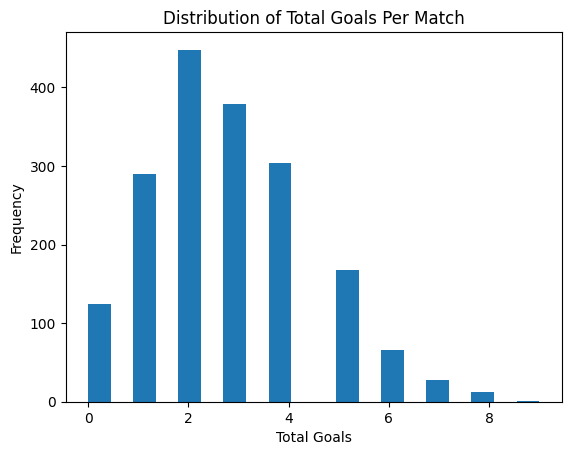

In [15]:
# this shows the scored goals allover matches
plot_histogram(mtc, 'total_goals',
               'Distribution of Total Goals Per Match',
               'Total Goals', 'Frequency', bins=20)

This shows that most of matches are low scoring (0-2), so it is right skewed, and 10&9 goals are outliers

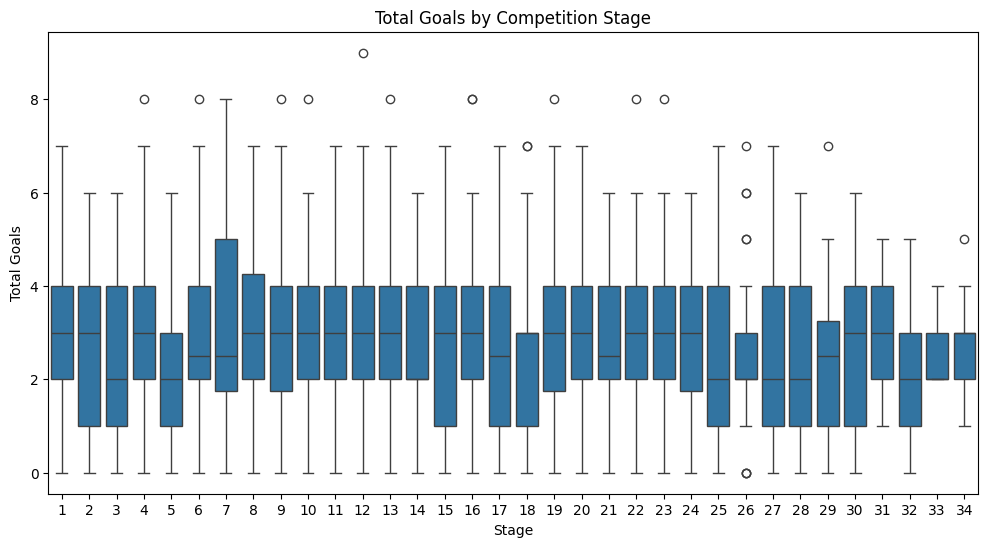

In [16]:
# creating a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='stage', y='total_goals', data=mtc)
plt.title('Total Goals by Competition Stage')
plt.xlabel('Stage')
plt.ylabel('Total Goals')
plt.show()

This shows how total goals vary across different competition stages.
The outliers showed in the 1d visualization are started to appear.

#5.conclusion

##5.1.Stated Relation

1. There is a weak relation between number of scored goals during matches and the progress of stages, as we find from the 2d visualization that the medians are close to each other.
2. These medians are getting high and low without a relation with stage progress that is why there is a weak one.
3. It is observed that stages have no outliers, and others have very far outliers, so the relation we are discussing can be observed if we study each stage alone.

##5.2.Limitation

The time wasn't enough for studying the data well or getting the huge number of nulls values from searching, and this effects the data quality and precission.

##5.3.Additional research can be done

1. We recommend studying each season with its own, then comparing each season's statistics with each other.
2. Relation between leagues and number of goals scored can be a segnificant topic to research about.
3. From the most anxious research can be done also is the one between country and the number of goals scored every match.